In [ ]:
print("JAI SHREE GANESH !!")

JAI SHREE GANESH !!


In [ ]:
import kagglehub
import os

In [ ]:
!pip install kaggle kagglehub


path = kagglehub.dataset_download("gauravduttakiit/cassava-leaf-disease-classification")

In [ ]:
drive_path = '/content/drive/My Drive/Dataset'
path = kagglehub.dataset_download("gauravduttakiit/cassava-leaf-disease-classification")

100%|██████████| 2.39G/2.39G [01:29<00:00, 28.6MB/s]

Extracting files...


In [ ]:
# Download latest version
path = kagglehub.dataset_download("gauravduttakiit/cassava-leaf-disease-classification")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/gauravduttakiit/cassava-leaf-disease-classification/versions/1


In [ ]:
import os

# Path where dataset is downloaded
dataset_path = path  # Assuming 'path' contains the extracted dataset location

# List all files and directories
print("Contents of the dataset directory:")
print(os.listdir(dataset_path))


Contents of the dataset directory:
['train', 'test']


In [ ]:
import os

train_path = os.path.join(dataset_path, "train")
print("Contents of train directory:", os.listdir(train_path))


Contents of train directory: ['Cassava Mosaic Disease (CMD)', 'Cassava Brown Streak Disease (CBSD)', 'Healthy', 'Cassava Bacterial Blight (CBB)', 'Cassava Green Mottle (CGM)']


In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# To ignore warinings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf

# Define paths
batch_size = 32
img_size = (224, 224)  # Resize all images to this size
train_dir = train_path
# Load train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"  # Can also be "categorical"
)

# Check dataset structure
class_names = train_ds.class_names
print("Class names:", class_names)


Found 17117 files belonging to 5 classes.
Class names: ['Cassava Bacterial Blight (CBB)', 'Cassava Brown Streak Disease (CBSD)', 'Cassava Green Mottle (CGM)', 'Cassava Mosaic Disease (CMD)', 'Healthy']


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0


In [ ]:
pip install onnx onnx2tf tensorflow torch torchvision


ERROR: Operation cancelled by user


In [ ]:
import tensorflow as tf
import os

# Define paths
batch_size = 32
img_size = (320, 320)  # SSD-Lite input size

# Function to load images and provide both class & dummy bounding box labels
def parse_image(image, label):
    bbox = tf.constant([0.1, 0.1, 0.8, 0.8], dtype=tf.float32)  # Placeholder bounding box [x_min, y_min, x_max, y_max]
    return image, (label, bbox)

# Load dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)

# Apply parsing function to match model output
train_ds = train_ds.map(parse_image)

# Check dataset output
for images, (labels, bboxes) in train_ds.take(1):
    print("Image shape:", images.shape)
    print("Labels shape:", labels.shape)
    print("Bounding Boxes shape:", bboxes.shape)


Found 17117 files belonging to 5 classes.
Image shape: (32, 320, 320, 3)
Labels shape: (32,)
Bounding Boxes shape: (4,)


In [ ]:
import torch
import torchvision.models as models

# Load ShuffleNetV2 from PyTorch
shufflenet_v2 = models.shufflenet_v2_x1_0(pretrained=True)
shufflenet_v2.eval()  # Set to evaluation mode

# Convert to TensorFlow (Optional: Use `tf.saved_model.save` or `onnx`)


Downloading: "https://download.pytorch.org/models/shufflenetv2_x1-5666bf0f80.pth" to /root/.cache/torch/hub/checkpoints/shufflenetv2_x1-5666bf0f80.pth
100%|██████████| 8.79M/8.79M [00:00<00:00, 68.8MB/s]


ShuffleNetV2(
  (conv1): Sequential(
    (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (stage2): Sequential(
    (0): InvertedResidual(
      (branch1): Sequential(
        (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=24, bias=False)
        (1): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (3): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (4): ReLU(inplace=True)
      )
      (branch2): Sequential(
        (0): Conv2d(24, 58, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(58, eps=1e-05, momentum=0.1, affine=True, track_running_

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.models import shufflenet_v2_x1_0
import os
from sklearn.model_selection import train_test_split
from PIL import Image

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Data transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of ShuffleNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard normalization
])

# Load the dataset (Ensure all images are in one directory)
dataset_dir = os.path.join(path, 'train') # Update this with the actual dataset path

# Load all the images
dataset = datasets.ImageFolder(root=dataset_dir, transform=transform)

# Split dataset into training and validation sets (80% train, 20% validation)
train_size = int(0.8 * len(dataset))  # 80% for training
val_size = len(dataset) - train_size  # 20% for validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

# Define ShuffleNetV2 model
model = shufflenet_v2_x1_0(pretrained=True)  # Load the pre-trained model
num_ftrs = model.fc.in_features  # Get the number of input features to the final layer
model.fc = nn.Linear(num_ftrs, len(dataset.classes))  # Replace with the correct number of classes

model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
num_epochs = 1

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print which label is being processed for each batch
        if batch_idx % 100 == 0:  # Print every 100 batches (you can adjust this)
            print(f"Batch {batch_idx}, Processing labels: {labels}, Predictions: {predicted}")

    # Print statistics at the end of the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}, Accuracy: {100 * correct/total:.2f}%")

# Validation Loop
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch_idx, (inputs, labels) in enumerate(val_loader):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Get predictions
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Print which label is being processed for each batch
        if batch_idx % 50 == 0:  # Print every 50 batches (you can adjust this)
            print(f"Validation Batch {batch_idx}, Processing labels: {labels}, Predictions: {predicted}")

print(f"Validation Accuracy: {100 * correct/total:.2f}%")


Batch 0, Processing labels: tensor([4, 3, 4, 0, 3, 3, 4, 3, 3, 3, 3, 4, 1, 3, 3, 3, 1, 1, 3, 2, 3, 4, 3, 3,
        3, 3, 3, 2, 3, 2, 1, 2]), Predictions: tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2])


KeyboardInterrupt: 

In [ ]:
# After the training loop, save the model
torch.save(model.state_dict(), 'shufflenet_model.pth')


In [ ]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from torchvision.models import shufflenet_v2_x1_0
from PIL import Image
from google.colab import files
import os
import matplotlib.pyplot as plt

# Load the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dataset_dir = os.path.join(path, 'train') # Update this with the actual dataset path


# Load the pre-trained ShuffleNet model (without the pre-trained weights)
model = shufflenet_v2_x1_0(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(os.listdir(dataset_dir)))  # Update model for correct number of classes
model.load_state_dict(torch.load('shufflenet_model.pth'))  # Load the trained model weights
model = model.to(device)
model.eval()  # Set to evaluation mode

# Define the image transformation for inference
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to the input size of ShuffleNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Standard normalization
])

# Function to classify a new image
def classify_image(image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0).to(device)  # Add batch dimension and move to device

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        predicted_class = predicted.item()

    # Get class labels (Assuming dataset structure has one folder per class)
    class_names = os.listdir(dataset_dir)  # Directory containing subfolders for each class
    predicted_label = class_names[predicted_class]

    return predicted_label

# Step 1: Upload image via Colab's file uploader
uploaded = files.upload()

# Step 2: Retrieve the file path of the uploaded image
for image_name in uploaded.keys():
    image_path = image_name  # Path to the uploaded image

# Step 3: Classify the uploaded image
predicted_class = classify_image(image_path)
print(f"The uploaded image belongs to class: {predicted_class}")

# Step 4: Display the image with X and Y axes
image = Image.open(image_path)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title(f"Predicted Class: {predicted_class}")
plt.show()


In [ ]:
import torch
from torchvision import models
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models.detection.ssd import SSDHead
from torchvision.ops import MultiScaleRoIAlign

# Define SSD with ShuffleNetV2 as feature extractor
class SSDShuffleNetV2(nn.Module):
    def __init__(self, num_classes=21):  # 21 classes (20 + background for VOC)
        super(SSDShuffleNetV2, self).__init__()

        # Load the ShuffleNetV2 backbone
        backbone = models.shufflenet_v2_x1_0(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(backbone.children())[:-1])  # Remove classification head

        # Additional convolutional layers for multi-scale feature extraction
        self.extra_layers = nn.Sequential(
            nn.Conv2d(1024, 256, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        # SSD prediction layers
        self.ssd_head = SSDHead(in_channels=[1024, 512], num_anchors=[6, 6], num_classes=num_classes)

    def forward(self, x):
        features = []
        x = self.feature_extractor(x)  # Extract base features
        features.append(x)  # First feature map from backbone

        x = self.extra_layers(x)  # Additional feature map
        features.append(x)

        # SSD head for classification and regression
        return self.ssd_head(features)

# Instantiate the model
num_classes = 21  # Change as per dataset (e.g., 5 for custom classes + background)
model = SSDShuffleNetV2(num_classes=num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model summary
print(model)


In [6]:
""" START FROM HERE """

import kagglehub
import os

In [7]:
drive_path = '/content/drive/My Drive/Dataset'
path = kagglehub.dataset_download("gauravduttakiit/cassava-leaf-disease-classification")

100%|██████████| 2.39G/2.39G [00:39<00:00, 65.7MB/s]


Extracting files...


In [20]:
import os
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

# Define dataset path
dataset_path = os.path.join(path, 'train') # Update this with the actual dataset path

# Define transformations
transform = transforms.Compose([
    transforms.Resize((300, 300)),  # Resize images for SSD input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load dataset using ImageFolder
train_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)

# Print dataset details
print(f"Dataset Loaded: {len(train_dataset)} images across {len(train_dataset.classes)} classes.")
print("Class names:", train_dataset.classes)
dataset_path = os.path.join(path, 'test')

# Load the testing dataset using ImageFolder
test_dataset = datasets.ImageFolder(root=dataset_path, transform=transform)

# Create DataLoader for the training dataset
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)

# Create DataLoader for the testing dataset
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=2)


Dataset Loaded: 17117 images across 5 classes.
Class names: ['Cassava Bacterial Blight (CBB)', 'Cassava Brown Streak Disease (CBSD)', 'Cassava Green Mottle (CGM)', 'Cassava Mosaic Disease (CMD)', 'Healthy']


In [21]:
import torchvision
import torch.nn as nn
from torchvision.models import shufflenet_v2_x1_0

# Load ShuffleNetV2 as feature extractor
base_model = shufflenet_v2_x1_0(pretrained=True)

# Remove the classification head
num_ftrs = base_model.fc.in_features
base_model.fc = nn.Identity()  # Remove final FC layer

# Define SSD head for classification (instead of bounding boxes)
class SSDClassifier(nn.Module):
    def __init__(self, base_model, num_classes):
        super(SSDClassifier, self).__init__()
        self.feature_extractor = base_model  # Use ShuffleNetV2 as backbone
        self.classifier = nn.Linear(num_ftrs, num_classes)  # Custom head for classification

    def forward(self, x):
        features = self.feature_extractor(x)
        output = self.classifier(features)
        return output

# Initialize SSD model with ShuffleNet backbone
num_classes = len(train_dataset.classes)
model = SSDClassifier(base_model, num_classes)

# Move model to GPU (if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

print("Model successfully initialized!")


Model successfully initialized!


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ShuffleNet_V2_X1_0_Weights.IMAGENET1K_V1`. You can also use `weights=ShuffleNet_V2_X1_0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.metrics import confusion_matrix, classification_report

num_epochs = 1  # Increase as needed
batch_interval = 10  # Print updates every 10 batches

train_losses, val_losses = [], []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    print(f"\n🔄 Training Epoch {epoch+1}/{num_epochs}...")

    progress_bar = tqdm(enumerate(train_loader), total=len(train_loader), desc=f"Epoch {epoch+1}")

    for batch_idx, (images, labels) in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (batch_idx + 1) % batch_interval == 0:
            batch_loss = running_loss / (batch_idx + 1)
            batch_acc = 100 * correct / total
            print(f"📌 Batch {batch_idx+1}/{len(train_loader)} - Loss: {batch_loss:.4f} | Accuracy: {batch_acc:.2f}%")

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)

    print(f"✅ Epoch {epoch+1} Completed | Loss: {epoch_loss:.4f} | Accuracy: {epoch_acc:.2f}%\n")

# 🎯 Model Evaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="🧪 Evaluating Model"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# 📊 Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📄 Classification Report
print("\n📜 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 📈 Train vs Validation Loss Graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, 'b-', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

print("🎉 Training & Evaluation Completed!")



🔄 Training Epoch 1/1...


Epoch 1:   1%|          | 10/1070 [00:25<41:44,  2.36s/it]

📌 Batch 10/1070 - Loss: 1.5177 | Accuracy: 51.88%


Epoch 1:   2%|▏         | 20/1070 [00:47<38:17,  2.19s/it]

📌 Batch 20/1070 - Loss: 1.3448 | Accuracy: 58.44%


Epoch 1:   3%|▎         | 30/1070 [01:05<32:27,  1.87s/it]

📌 Batch 30/1070 - Loss: 1.2237 | Accuracy: 61.04%


Epoch 1:   4%|▎         | 40/1070 [01:24<32:15,  1.88s/it]

📌 Batch 40/1070 - Loss: 1.1593 | Accuracy: 60.94%


Epoch 1:   5%|▍         | 50/1070 [01:44<35:01,  2.06s/it]

📌 Batch 50/1070 - Loss: 1.1215 | Accuracy: 61.12%


Epoch 1:   6%|▌         | 60/1070 [02:03<31:01,  1.84s/it]

📌 Batch 60/1070 - Loss: 1.0912 | Accuracy: 61.56%


Epoch 1:   7%|▋         | 70/1070 [02:22<29:38,  1.78s/it]

📌 Batch 70/1070 - Loss: 1.0535 | Accuracy: 62.86%


Epoch 1:   7%|▋         | 80/1070 [02:43<34:40,  2.10s/it]

📌 Batch 80/1070 - Loss: 1.0330 | Accuracy: 63.44%


Epoch 1:   8%|▊         | 90/1070 [03:02<30:06,  1.84s/it]

📌 Batch 90/1070 - Loss: 1.0034 | Accuracy: 64.17%


Epoch 1:   9%|▉         | 100/1070 [03:21<30:49,  1.91s/it]

📌 Batch 100/1070 - Loss: 0.9759 | Accuracy: 64.88%


Epoch 1:  10%|█         | 110/1070 [03:40<30:40,  1.92s/it]

📌 Batch 110/1070 - Loss: 0.9633 | Accuracy: 65.17%


Epoch 1:  11%|█         | 120/1070 [03:58<28:43,  1.81s/it]

📌 Batch 120/1070 - Loss: 0.9567 | Accuracy: 65.21%


Epoch 1:  12%|█▏        | 130/1070 [04:17<29:26,  1.88s/it]

📌 Batch 130/1070 - Loss: 0.9469 | Accuracy: 65.38%


Epoch 1:  13%|█▎        | 140/1070 [04:37<30:41,  1.98s/it]

📌 Batch 140/1070 - Loss: 0.9489 | Accuracy: 65.49%


Epoch 1:  14%|█▍        | 150/1070 [04:55<27:36,  1.80s/it]

📌 Batch 150/1070 - Loss: 0.9320 | Accuracy: 66.25%


Epoch 1:  15%|█▍        | 160/1070 [05:14<28:24,  1.87s/it]

📌 Batch 160/1070 - Loss: 0.9159 | Accuracy: 66.91%


Epoch 1:  16%|█▌        | 170/1070 [05:33<29:34,  1.97s/it]

📌 Batch 170/1070 - Loss: 0.9082 | Accuracy: 67.35%


Epoch 1:  17%|█▋        | 180/1070 [05:52<27:30,  1.85s/it]

📌 Batch 180/1070 - Loss: 0.9045 | Accuracy: 67.43%


Epoch 1:  18%|█▊        | 190/1070 [06:11<26:55,  1.84s/it]

📌 Batch 190/1070 - Loss: 0.8955 | Accuracy: 67.73%


Epoch 1:  19%|█▊        | 200/1070 [06:31<28:35,  1.97s/it]

📌 Batch 200/1070 - Loss: 0.8932 | Accuracy: 67.84%


Epoch 1:  20%|█▉        | 210/1070 [06:50<26:47,  1.87s/it]

📌 Batch 210/1070 - Loss: 0.8847 | Accuracy: 68.04%


Epoch 1:  21%|██        | 220/1070 [07:09<26:53,  1.90s/it]

📌 Batch 220/1070 - Loss: 0.8743 | Accuracy: 68.55%


Epoch 1:  21%|██▏       | 230/1070 [07:28<27:26,  1.96s/it]

📌 Batch 230/1070 - Loss: 0.8681 | Accuracy: 68.75%


Epoch 1:  22%|██▏       | 240/1070 [07:47<25:00,  1.81s/it]

📌 Batch 240/1070 - Loss: 0.8577 | Accuracy: 69.11%


Epoch 1:  23%|██▎       | 250/1070 [08:06<25:40,  1.88s/it]

📌 Batch 250/1070 - Loss: 0.8496 | Accuracy: 69.40%


Epoch 1:  24%|██▍       | 260/1070 [08:25<26:27,  1.96s/it]

📌 Batch 260/1070 - Loss: 0.8426 | Accuracy: 69.66%


Epoch 1:  25%|██▌       | 270/1070 [08:44<24:25,  1.83s/it]

📌 Batch 270/1070 - Loss: 0.8321 | Accuracy: 69.98%


Epoch 1:  26%|██▌       | 280/1070 [09:02<23:59,  1.82s/it]

📌 Batch 280/1070 - Loss: 0.8265 | Accuracy: 70.09%


Epoch 1:  27%|██▋       | 290/1070 [09:22<25:14,  1.94s/it]

📌 Batch 290/1070 - Loss: 0.8228 | Accuracy: 70.28%


Epoch 1:  28%|██▊       | 300/1070 [09:40<23:39,  1.84s/it]

📌 Batch 300/1070 - Loss: 0.8220 | Accuracy: 70.31%


Epoch 1:  29%|██▉       | 310/1070 [09:59<22:37,  1.79s/it]

📌 Batch 310/1070 - Loss: 0.8164 | Accuracy: 70.54%


Epoch 1:  30%|██▉       | 320/1070 [10:19<24:45,  1.98s/it]

📌 Batch 320/1070 - Loss: 0.8126 | Accuracy: 70.55%


Epoch 1:  31%|███       | 330/1070 [10:37<22:48,  1.85s/it]

📌 Batch 330/1070 - Loss: 0.8088 | Accuracy: 70.61%


Epoch 1:  32%|███▏      | 340/1070 [11:02<28:58,  2.38s/it]

📌 Batch 340/1070 - Loss: 0.8049 | Accuracy: 70.81%


Epoch 1:  33%|███▎      | 350/1070 [11:20<22:23,  1.87s/it]

📌 Batch 350/1070 - Loss: 0.8024 | Accuracy: 71.02%


Epoch 1:  34%|███▎      | 360/1070 [11:39<21:12,  1.79s/it]

📌 Batch 360/1070 - Loss: 0.7982 | Accuracy: 71.22%


Epoch 1:  35%|███▍      | 370/1070 [11:59<23:44,  2.04s/it]

📌 Batch 370/1070 - Loss: 0.7957 | Accuracy: 71.28%


Epoch 1:  36%|███▌      | 380/1070 [12:18<21:55,  1.91s/it]

📌 Batch 380/1070 - Loss: 0.7946 | Accuracy: 71.32%


Epoch 1:  36%|███▋      | 390/1070 [12:37<21:29,  1.90s/it]

📌 Batch 390/1070 - Loss: 0.7903 | Accuracy: 71.51%


Epoch 1:  37%|███▋      | 400/1070 [12:57<21:51,  1.96s/it]

📌 Batch 400/1070 - Loss: 0.7858 | Accuracy: 71.69%


Epoch 1:  38%|███▊      | 410/1070 [13:15<20:05,  1.83s/it]

📌 Batch 410/1070 - Loss: 0.7786 | Accuracy: 71.95%


Epoch 1:  39%|███▉      | 420/1070 [13:34<20:51,  1.93s/it]

📌 Batch 420/1070 - Loss: 0.7719 | Accuracy: 72.23%


Epoch 1:  40%|████      | 430/1070 [13:54<20:24,  1.91s/it]

📌 Batch 430/1070 - Loss: 0.7654 | Accuracy: 72.46%


Epoch 1:  41%|████      | 440/1070 [14:13<19:27,  1.85s/it]

📌 Batch 440/1070 - Loss: 0.7612 | Accuracy: 72.61%


Epoch 1:  42%|████▏     | 450/1070 [14:33<21:10,  2.05s/it]

📌 Batch 450/1070 - Loss: 0.7575 | Accuracy: 72.71%


Epoch 1:  43%|████▎     | 460/1070 [14:51<18:42,  1.84s/it]

📌 Batch 460/1070 - Loss: 0.7563 | Accuracy: 72.76%


Epoch 1:  44%|████▍     | 470/1070 [15:09<17:49,  1.78s/it]

📌 Batch 470/1070 - Loss: 0.7533 | Accuracy: 72.90%


Epoch 1:  45%|████▍     | 480/1070 [15:29<19:39,  2.00s/it]

📌 Batch 480/1070 - Loss: 0.7521 | Accuracy: 72.97%


Epoch 1:  46%|████▌     | 490/1070 [15:47<18:00,  1.86s/it]

📌 Batch 490/1070 - Loss: 0.7487 | Accuracy: 73.05%


Epoch 1:  47%|████▋     | 500/1070 [16:05<16:42,  1.76s/it]

📌 Batch 500/1070 - Loss: 0.7456 | Accuracy: 73.16%


Epoch 1:  48%|████▊     | 510/1070 [16:25<19:05,  2.04s/it]

📌 Batch 510/1070 - Loss: 0.7414 | Accuracy: 73.36%


Epoch 1:  49%|████▊     | 520/1070 [16:43<17:10,  1.87s/it]

📌 Batch 520/1070 - Loss: 0.7370 | Accuracy: 73.50%


Epoch 1:  50%|████▉     | 530/1070 [17:01<15:42,  1.75s/it]

📌 Batch 530/1070 - Loss: 0.7361 | Accuracy: 73.60%


Epoch 1:  50%|█████     | 540/1070 [17:20<17:35,  1.99s/it]

📌 Batch 540/1070 - Loss: 0.7349 | Accuracy: 73.65%


Epoch 1:  51%|█████▏    | 550/1070 [17:39<16:13,  1.87s/it]

📌 Batch 550/1070 - Loss: 0.7322 | Accuracy: 73.75%


Epoch 1:  52%|█████▏    | 560/1070 [17:57<15:06,  1.78s/it]

📌 Batch 560/1070 - Loss: 0.7305 | Accuracy: 73.85%


Epoch 1:  53%|█████▎    | 570/1070 [18:16<16:44,  2.01s/it]

📌 Batch 570/1070 - Loss: 0.7299 | Accuracy: 73.89%


Epoch 1:  54%|█████▍    | 580/1070 [18:35<14:55,  1.83s/it]

📌 Batch 580/1070 - Loss: 0.7274 | Accuracy: 73.95%


Epoch 1:  55%|█████▌    | 590/1070 [18:53<14:10,  1.77s/it]

📌 Batch 590/1070 - Loss: 0.7253 | Accuracy: 74.01%


Epoch 1:  56%|█████▌    | 600/1070 [19:13<15:45,  2.01s/it]

📌 Batch 600/1070 - Loss: 0.7241 | Accuracy: 74.10%


Epoch 1:  57%|█████▋    | 610/1070 [19:31<14:06,  1.84s/it]

📌 Batch 610/1070 - Loss: 0.7223 | Accuracy: 74.16%


Epoch 1:  58%|█████▊    | 620/1070 [19:50<13:44,  1.83s/it]

📌 Batch 620/1070 - Loss: 0.7195 | Accuracy: 74.22%


Epoch 1:  59%|█████▉    | 630/1070 [20:10<14:33,  1.98s/it]

📌 Batch 630/1070 - Loss: 0.7173 | Accuracy: 74.30%


Epoch 1:  60%|█████▉    | 640/1070 [20:28<12:53,  1.80s/it]

📌 Batch 640/1070 - Loss: 0.7154 | Accuracy: 74.41%


Epoch 1:  61%|██████    | 650/1070 [20:47<13:20,  1.91s/it]

📌 Batch 650/1070 - Loss: 0.7122 | Accuracy: 74.54%


Epoch 1:  62%|██████▏   | 660/1070 [21:12<16:04,  2.35s/it]

📌 Batch 660/1070 - Loss: 0.7115 | Accuracy: 74.59%


Epoch 1:  63%|██████▎   | 670/1070 [21:30<12:26,  1.87s/it]

📌 Batch 670/1070 - Loss: 0.7108 | Accuracy: 74.58%


Epoch 1:  64%|██████▎   | 680/1070 [21:50<12:57,  1.99s/it]

📌 Batch 680/1070 - Loss: 0.7099 | Accuracy: 74.64%


Epoch 1:  64%|██████▍   | 690/1070 [22:09<11:47,  1.86s/it]

📌 Batch 690/1070 - Loss: 0.7096 | Accuracy: 74.65%


Epoch 1:  65%|██████▌   | 700/1070 [22:28<11:51,  1.92s/it]

📌 Batch 700/1070 - Loss: 0.7088 | Accuracy: 74.67%


Epoch 1:  66%|██████▋   | 710/1070 [22:48<11:50,  1.97s/it]

📌 Batch 710/1070 - Loss: 0.7073 | Accuracy: 74.72%


Epoch 1:  67%|██████▋   | 720/1070 [23:07<10:51,  1.86s/it]

📌 Batch 720/1070 - Loss: 0.7076 | Accuracy: 74.73%


Epoch 1:  68%|██████▊   | 730/1070 [23:27<11:57,  2.11s/it]

📌 Batch 730/1070 - Loss: 0.7071 | Accuracy: 74.77%


Epoch 1:  69%|██████▉   | 740/1070 [23:45<10:22,  1.89s/it]

📌 Batch 740/1070 - Loss: 0.7048 | Accuracy: 74.89%


Epoch 1:  70%|███████   | 750/1070 [24:06<11:00,  2.06s/it]

📌 Batch 750/1070 - Loss: 0.7021 | Accuracy: 75.01%


Epoch 1:  71%|███████   | 760/1070 [24:26<10:07,  1.96s/it]

📌 Batch 760/1070 - Loss: 0.7006 | Accuracy: 75.10%


Epoch 1:  72%|███████▏  | 770/1070 [24:45<09:25,  1.88s/it]

📌 Batch 770/1070 - Loss: 0.7001 | Accuracy: 75.10%


Epoch 1:  73%|███████▎  | 780/1070 [25:05<10:18,  2.13s/it]

📌 Batch 780/1070 - Loss: 0.6999 | Accuracy: 75.10%


Epoch 1:  74%|███████▍  | 790/1070 [25:25<09:16,  1.99s/it]

📌 Batch 790/1070 - Loss: 0.6977 | Accuracy: 75.13%


Epoch 1:  75%|███████▍  | 800/1070 [25:45<09:21,  2.08s/it]

📌 Batch 800/1070 - Loss: 0.6963 | Accuracy: 75.20%


Epoch 1:  76%|███████▌  | 810/1070 [26:04<08:17,  1.91s/it]

📌 Batch 810/1070 - Loss: 0.6949 | Accuracy: 75.25%


Epoch 1:  77%|███████▋  | 820/1070 [26:23<07:31,  1.81s/it]

📌 Batch 820/1070 - Loss: 0.6939 | Accuracy: 75.26%


Epoch 1:  78%|███████▊  | 830/1070 [26:43<08:29,  2.12s/it]

📌 Batch 830/1070 - Loss: 0.6930 | Accuracy: 75.32%


Epoch 1:  79%|███████▊  | 840/1070 [27:03<07:58,  2.08s/it]

📌 Batch 840/1070 - Loss: 0.6909 | Accuracy: 75.38%


Epoch 1:  79%|███████▉  | 850/1070 [27:23<07:37,  2.08s/it]

📌 Batch 850/1070 - Loss: 0.6894 | Accuracy: 75.44%


Epoch 1:  80%|████████  | 860/1070 [27:43<07:00,  2.00s/it]

📌 Batch 860/1070 - Loss: 0.6870 | Accuracy: 75.55%


Epoch 1:  81%|████████▏ | 870/1070 [28:03<06:30,  1.95s/it]

📌 Batch 870/1070 - Loss: 0.6857 | Accuracy: 75.60%


Epoch 1:  82%|████████▏ | 880/1070 [28:24<06:30,  2.06s/it]

📌 Batch 880/1070 - Loss: 0.6871 | Accuracy: 75.56%


Epoch 1:  83%|████████▎ | 890/1070 [28:43<05:48,  1.94s/it]

📌 Batch 890/1070 - Loss: 0.6862 | Accuracy: 75.61%


Epoch 1:  84%|████████▍ | 900/1070 [29:03<05:54,  2.08s/it]

📌 Batch 900/1070 - Loss: 0.6844 | Accuracy: 75.69%


Epoch 1:  85%|████████▌ | 910/1070 [29:22<05:00,  1.88s/it]

📌 Batch 910/1070 - Loss: 0.6835 | Accuracy: 75.73%


Epoch 1:  86%|████████▌ | 920/1070 [29:41<04:31,  1.81s/it]

📌 Batch 920/1070 - Loss: 0.6824 | Accuracy: 75.75%


Epoch 1:  87%|████████▋ | 930/1070 [30:02<04:58,  2.14s/it]

📌 Batch 930/1070 - Loss: 0.6807 | Accuracy: 75.84%


Epoch 1:  88%|████████▊ | 940/1070 [30:21<04:06,  1.90s/it]

📌 Batch 940/1070 - Loss: 0.6794 | Accuracy: 75.91%


Epoch 1:  89%|████████▉ | 950/1070 [30:42<04:16,  2.14s/it]

📌 Batch 950/1070 - Loss: 0.6778 | Accuracy: 75.95%


Epoch 1:  90%|████████▉ | 960/1070 [31:00<03:25,  1.87s/it]

📌 Batch 960/1070 - Loss: 0.6766 | Accuracy: 76.02%


Epoch 1:  91%|█████████ | 970/1070 [31:26<04:05,  2.45s/it]

📌 Batch 970/1070 - Loss: 0.6752 | Accuracy: 76.05%


Epoch 1:  92%|█████████▏| 980/1070 [31:45<02:52,  1.92s/it]

📌 Batch 980/1070 - Loss: 0.6749 | Accuracy: 76.06%


Epoch 1:  93%|█████████▎| 990/1070 [32:05<02:41,  2.01s/it]

📌 Batch 990/1070 - Loss: 0.6751 | Accuracy: 76.06%


Epoch 1:  93%|█████████▎| 1000/1070 [32:25<02:15,  1.94s/it]

📌 Batch 1000/1070 - Loss: 0.6736 | Accuracy: 76.12%


Epoch 1:  94%|█████████▍| 1010/1070 [32:43<01:50,  1.85s/it]

📌 Batch 1010/1070 - Loss: 0.6722 | Accuracy: 76.16%


Epoch 1:  95%|█████████▌| 1020/1070 [33:04<01:49,  2.18s/it]

📌 Batch 1020/1070 - Loss: 0.6714 | Accuracy: 76.19%


Epoch 1:  96%|█████████▋| 1030/1070 [33:23<01:15,  1.90s/it]

📌 Batch 1030/1070 - Loss: 0.6701 | Accuracy: 76.23%


Epoch 1:  97%|█████████▋| 1040/1070 [33:42<00:58,  1.93s/it]

📌 Batch 1040/1070 - Loss: 0.6697 | Accuracy: 76.25%


Epoch 1:  98%|█████████▊| 1050/1070 [34:03<00:41,  2.09s/it]

📌 Batch 1050/1070 - Loss: 0.6686 | Accuracy: 76.26%


Epoch 1:  99%|█████████▉| 1060/1070 [34:22<00:18,  1.87s/it]

📌 Batch 1060/1070 - Loss: 0.6677 | Accuracy: 76.31%


Epoch 1: 100%|██████████| 1070/1070 [34:42<00:00,  1.95s/it]


📌 Batch 1070/1070 - Loss: 0.6675 | Accuracy: 76.29%
✅ Epoch 1 Completed | Loss: 0.6675 | Accuracy: 76.29%



🧪 Evaluating Model: 100%|██████████| 268/268 [03:20<00:00,  1.34it/s]


NameError: name 'class_names' is not defined

<Figure size 800x600 with 0 Axes>

In [23]:
print("Class names:", test_dataset.classes)


Class names: ['Cassava Bacterial Blight (CBB)', 'Cassava Brown Streak Disease (CBSD)', 'Cassava Green Mottle (CGM)', 'Cassava Mosaic Disease (CMD)', 'Healthy']


🧪 Evaluating Model: 100%|██████████| 268/268 [03:23<00:00,  1.32it/s]


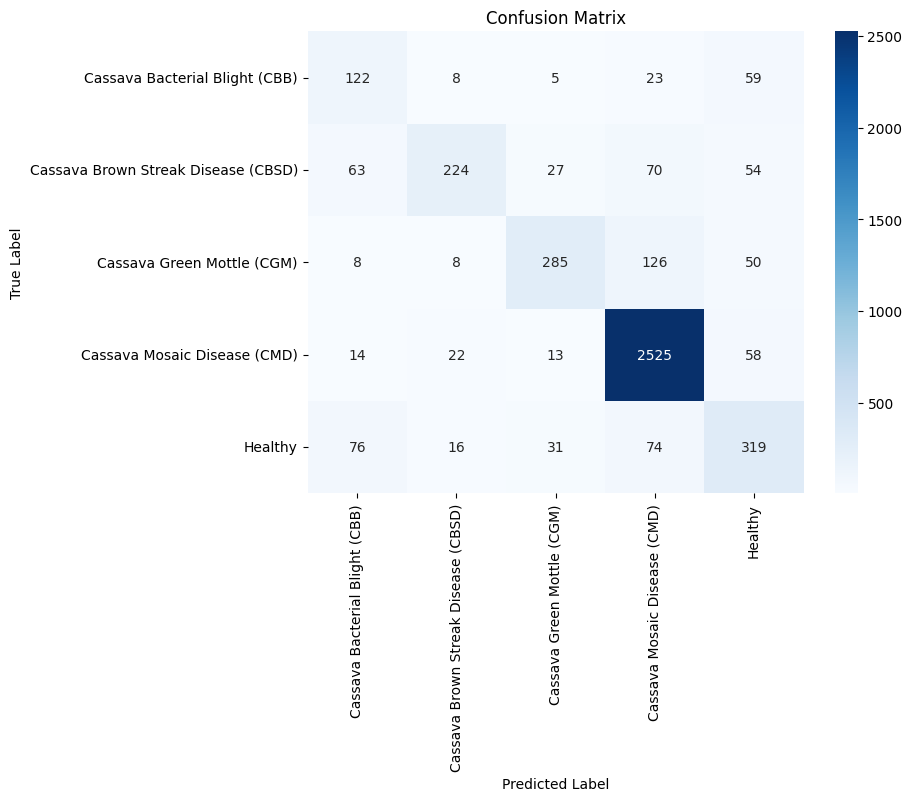


📜 Classification Report:

                                     precision    recall  f1-score   support

     Cassava Bacterial Blight (CBB)       0.43      0.56      0.49       217
Cassava Brown Streak Disease (CBSD)       0.81      0.51      0.63       438
         Cassava Green Mottle (CGM)       0.79      0.60      0.68       477
       Cassava Mosaic Disease (CMD)       0.90      0.96      0.93      2632
                            Healthy       0.59      0.62      0.60       516

                           accuracy                           0.81      4280
                          macro avg       0.70      0.65      0.66      4280
                       weighted avg       0.81      0.81      0.81      4280



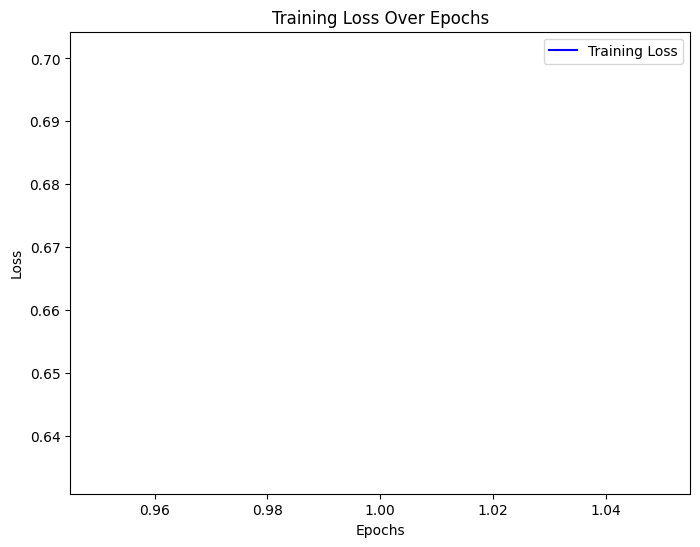

🎉 Training & Evaluation Completed!


In [24]:
# 🎯 Model Evaluation
model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="🧪 Evaluating Model"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# 📊 Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure correct class names
class_names = test_dataset.classes  # This will contain the class names from the test set

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 📄 Classification Report
print("\n📜 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# 📈 Train vs Validation Loss Graph (if needed, otherwise skip)
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), train_losses, 'b-', label="Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

print("🎉 Training & Evaluation Completed!")


In [25]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

model_save_path = "/content/drive/MyDrive/cnnmodel/cassava/cassava_model3.pth"  # Modify the path as per your folder structure

# Save the model state_dict
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved to /content/drive/MyDrive/cnnmodel/cassava/cassava_model3.pth


In [15]:
# Path to the saved model on Google Drive
load_save_path = "/content/drive/MyDrive/cnnmodel/cassava/cassava_model2.pth"  # Modify as per your folder structure

# Load the saved model state_dict
model.load_state_dict(torch.load(load_save_path, map_location='cpu'))  # 'cpu' or 'cuda' depending on your environment
model.eval()  # Set the model to evaluation mode

print(f"Model loaded from {load_save_path}")

Model loaded from /content/drive/MyDrive/cnnmodel/cassava/cassava_model2.pth


Saving 1398184409.jpg to 1398184409.jpg


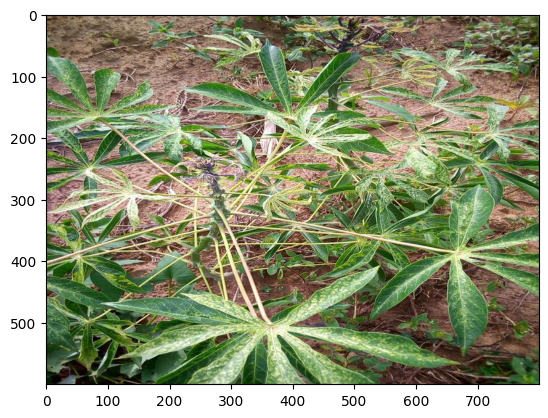

The uploaded image belongs to class: Cassava Green Mottle (CGM)


In [31]:
import torch
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt

# Function to classify an uploaded image and display it
def classify_image(image_path):
    image = Image.open(image_path).convert("RGB")

    # Display the image with axis
    plt.imshow(image)
    plt.axis('on')  # Show axes
    plt.show()

    # Preprocess the image
    image = transform(image).unsqueeze(0).to(device)  # Preprocess
    model.eval()

    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
        predicted_class = train_dataset.classes[predicted.item()]

    return predicted_class

# Upload an image
uploaded = files.upload()

# Loop through uploaded files and classify them
for image_name in uploaded.keys():
    image_path = image_name  # Path to the uploaded image
    predicted_class = classify_image(image_path)
    print(f"The uploaded image belongs to class: {predicted_class}")


In [28]:
import torch
from torch.utils.data import DataLoader, Subset
import random
from tqdm import tqdm  # Progress bar for iteration

# Function to calculate class-wise accuracy for a subset of the dataset
def calculate_classwise_accuracy(model, dataloader, subset_size=None):
    model.eval()  # Set model to evaluation mode
    class_correct = [0] * len(train_dataset.classes)  # List to store correct predictions for each class
    class_total = [0] * len(train_dataset.classes)  # List to store total instances for each class
    total_samples = 0  # Total samples processed for progress tracking

    # If subset_size is provided, take a random subset of the dataset
    if subset_size is not None:
        indices = random.sample(range(len(dataloader.dataset)), subset_size)
        subset_dataset = Subset(dataloader.dataset, indices)
        dataloader = DataLoader(subset_dataset, batch_size=dataloader.batch_size, shuffle=False)

    print("\n🔄 Calculating class-wise accuracy...\n")
    progress_bar = tqdm(dataloader, total=len(dataloader), desc="Processing batches")

    with torch.no_grad():
        for images, labels in progress_bar:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)  # Get predictions
            _, predicted = torch.max(outputs, 1)  # Get the predicted class labels

            # Update class-wise correct and total counts
            for i in range(len(labels)):
                label = labels[i].item()
                class_total[label] += 1
                if predicted[i].item() == label:
                    class_correct[label] += 1
                total_samples += 1

            # Update progress bar with the current accuracy values
            if total_samples % 100 == 0:  # Print every 100 samples processed
                progress_bar.set_postfix(total_samples=total_samples)

    # Calculate accuracy for each class
    classwise_accuracy = {}
    for i in range(len(train_dataset.classes)):
        if class_total[i] > 0:
            accuracy = 100 * class_correct[i] / class_total[i]
            classwise_accuracy[train_dataset.classes[i]] = accuracy
        else:
            classwise_accuracy[train_dataset.classes[i]] = 0.0

    return classwise_accuracy

# Example usage:
# Assuming 'train_loader' is your DataLoader for the training dataset
subset_size = 100  # Limit to 100 samples (or any subset size you want)
classwise_accuracy = calculate_classwise_accuracy(model, train_loader, subset_size=subset_size)

# Print the accuracy for each class
print("\n🔎 Class-wise accuracy results for the subset:")
for class_name, accuracy in classwise_accuracy.items():
    print(f"Class: {class_name} | Accuracy: {accuracy:.2f}%")



🔄 Calculating class-wise accuracy...



Processing batches: 100%|██████████| 7/7 [00:05<00:00,  1.25it/s, total_samples=100]


🔎 Class-wise accuracy results for the subset:
Class: Cassava Bacterial Blight (CBB) | Accuracy: 66.67%
Class: Cassava Brown Streak Disease (CBSD) | Accuracy: 71.43%
Class: Cassava Green Mottle (CGM) | Accuracy: 80.00%
Class: Cassava Mosaic Disease (CMD) | Accuracy: 95.24%
Class: Healthy | Accuracy: 71.43%


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models.detection import SSD, SSDHead
from torchvision.ops import MultiScaleRoIAlign

class SSDShuffleNetV2(nn.Module):
    def __init__(self, num_classes=21):  # 21 classes (20 + background for VOC)
        super(SSDShuffleNetV2, self).__init__()

        # Load the ShuffleNetV2 backbone (excluding the final classification layers)
        backbone = models.shufflenet_v2_x1_0(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(backbone.children())[:-1])  # Remove classification head

        # Additional layers for multi-scale feature extraction
        self.extra_layers = nn.Sequential(
            nn.Conv2d(1024, 256, kernel_size=1),
            nn.ReLU(),
            nn.Conv2d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )

        # SSD prediction layers (for class and bounding box prediction)
        self.ssd_head = SSDHead(in_channels=[1024, 512], num_anchors=[6, 6], num_classes=num_classes)

        # MultiScaleRoIAlign (to crop feature maps)
        self.roi_align = MultiScaleRoIAlign(output_size=(7, 7), sampling_ratio=2)

    def forward(self, x):
        features = []

        # Extract feature maps from backbone
        x = self.feature_extractor(x)
        features.append(x)  # First feature map from backbone

        # Generate additional feature map
        x = self.extra_layers(x)
        features.append(x)  # Second feature map

        # Use MultiScaleRoIAlign for multi-scale feature extraction
        roi_features = self.roi_align(features)

        # SSD head for classification and bounding box regression
        return self.ssd_head(roi_features)

# Instantiate the model
num_classes = 21  # Change as per dataset (e.g., 5 for custom classes + background)
model = SSDShuffleNetV2(num_classes=num_classes)

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model summary
print(model)
